C:\Users\kandu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.9756717094182625


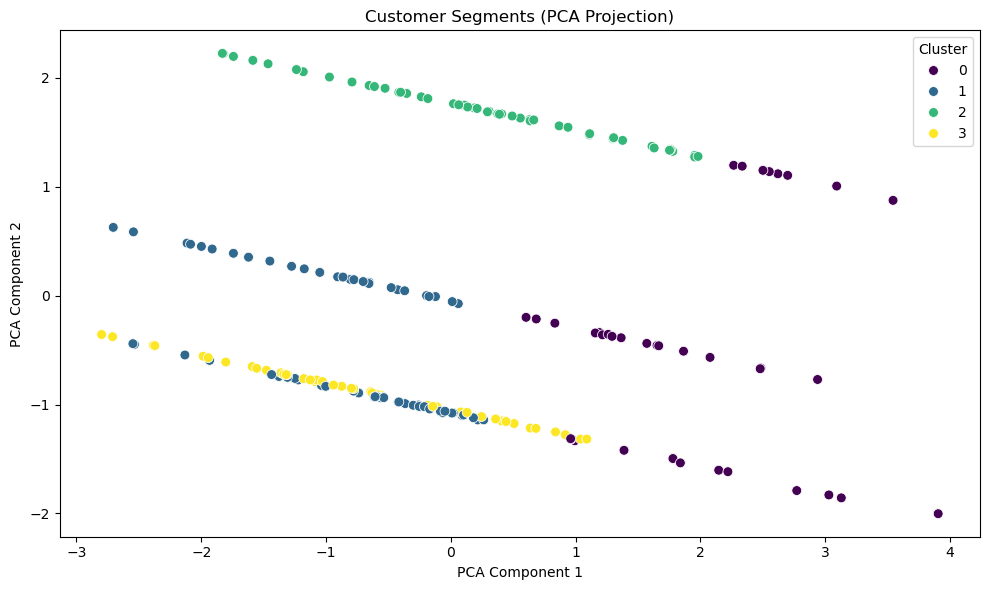

Clustering completed. Results saved to Customer_Segments.csv.


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv(r'C:\Users\kandu\Desktop\Downloads\Customers.csv')
transactions = pd.read_csv(r'C:\Users\kandu\Desktop\Downloads\Transactions.csv')


merged_data = transactions.merge(customers, on='CustomerID')


customer_summary = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()


customer_profile = customers.merge(customer_summary, on='CustomerID', how='left').fillna(0)


customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)


scaler = StandardScaler()
customer_features = scaler.fit_transform(customer_profile.drop(columns=['CustomerID', 'CustomerName', 'SignupDate']))


num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(customer_features)


temp_profile = customer_profile.copy()
temp_profile['Cluster'] = kmeans_labels


db_index = davies_bouldin_score(customer_features, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index}")


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(customer_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


customer_profile['Cluster'] = kmeans_labels
customer_profile[['CustomerID', 'Cluster']].to_csv('Customer_Segments.csv', index=False)

print("Clustering completed. Results saved to Customer_Segments.csv.")
